In [1]:
import requests
#from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import folium # map rendering library
#import json # library to handle JSON files
#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib as mpl
import matplotlib.pyplot as plt
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#import kmeans from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
# data = pd.read_csv(r'C:\Users\nx013429\Desktop\Coursera\dc-neighborhood-cluster-demographics.csv') 
#path1 = r'C:\Users\nx013429\Desktop\Coursera\dc-neighborhood-cluster-demographics.csv'
#path2= r'C:\Users\nx013429\Desktop\Coursera\dc-neighborhood-cluster-demographics.csv'
path3=r'http://ec2-54-235-58-226.compute-1.amazonaws.com/storage/f/2014-02-23T17%3A11%3A51.737Z/dc-neighborhood-cluster-demographics.csv'
df = pd.read_csv (path3,index_col=2)   #read the csv file (put 'r' before the path string to address any special characters, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
#'C:\Users\nx013429\Desktop\Coursera\dc-neighborhood-cluster-demographics.csv'
#print (path1)
print (path3)

http://ec2-54-235-58-226.compute-1.amazonaws.com/storage/f/2014-02-23T17%3A11%3A51.737Z/dc-neighborhood-cluster-demographics.csv


In [3]:
df.head()

,neighborhood_cluster,Cluster_num,Full_Name,lon_ctr,lat_ctr,Population,"Population,_1980","Population,_1990","Population,_2000","Population,_2010",...,Charter_school_enrollment_2005,Charter_school_enrollment_2006,Charter_school_enrollment_2007,Charter_school_enrollment_2008,Charter_school_enrollment_2009,Charter_school_enrollment_2010,Charter_school_enrollment_2011,Charter_school_enrollment_2012,CAS_math_prof,CAS_read_prof
Short_Name,,,,,,,,,,,,,,,,,,,,,
Adams Morgan,Cluster 1,1,"Kalorama Heights, Adams Morgan, Lanier Heights",-77.047702,38.919379,NaN,18149,17812,18167,18338,...,0,123,158,187,226,239,515,436,0.680769,0.634615
Columbia Heights,Cluster 2,2,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",-77.031769,38.928700,NaN,44081,45728,46779,47378,...,2026,2423,2714,2940,3445,3656,2926,3992,0.582751,0.529604
Shaw,Cluster 3,3,"Howard University, Le Droit Park, Cardozo/Shaw",-77.023415,38.921257,NaN,11335,10925,10128,12174,...,1305,1361,1407,1299,1362,1309,243,1507,0.550725,0.531401
Georgetown,Cluster 4,4,"Georgetown, Burleith/Hillandale",-77.066409,38.909686,NaN,16071,17919,18741,20464,...,0,53,86,0,0,0,0,0,0.859155,0.887324
Foggy Bottom,Cluster 5,5,"West End, Foggy Bottom, GWU",-77.048975,38.902386,NaN,10731,11104,11723,16160,...,0,0,0,0,0,0,0,0,0.666667,0.750000


In [4]:
#list(df)

In [3]:
# Add current population estimate to dataframe
pop2019 = [21407,55307,14211,23889,18865,20216,27894,15829,13527,13992,14260,18152,21664,13673,14976,4619,22711,46606,15416,10360,22741,9875,16938,13685,34198,24408,6660,5692,2854,7673,16927,15185,17380,17467,8975,8839,9422,11335,36140] 
df['Short_Name']=df.index  

df['Population'] = pop2019
#df.loc['Total'] = df.sum(numeric_only=True)
  
# Observe the result 
df

,neighborhood_cluster,Cluster_num,Full_Name,lon_ctr,lat_ctr,Population,"Population,_1980","Population,_1990","Population,_2000","Population,_2010",...,Charter_school_enrollment_2006,Charter_school_enrollment_2007,Charter_school_enrollment_2008,Charter_school_enrollment_2009,Charter_school_enrollment_2010,Charter_school_enrollment_2011,Charter_school_enrollment_2012,CAS_math_prof,CAS_read_prof,Short_Name
Short_Name,,,,,,,,,,,,,,,,,,,,,
Adams Morgan,Cluster 1,1,"Kalorama Heights, Adams Morgan, Lanier Heights",-77.047702,38.919379,21407,18149,17812,18167,18338,...,123,158,187,226,239,515,436,0.680769,0.634615,Adams Morgan
Columbia Heights,Cluster 2,2,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",-77.031769,38.928700,55307,44081,45728,46779,47378,...,2423,2714,2940,3445,3656,2926,3992,0.582751,0.529604,Columbia Heights
Shaw,Cluster 3,3,"Howard University, Le Droit Park, Cardozo/Shaw",-77.023415,38.921257,14211,11335,10925,10128,12174,...,1361,1407,1299,1362,1309,243,1507,0.550725,0.531401,Shaw
Georgetown,Cluster 4,4,"Georgetown, Burleith/Hillandale",-77.066409,38.909686,23889,16071,17919,18741,20464,...,53,86,0,0,0,0,0,0.859155,0.887324,Georgetown
Foggy Bottom,Cluster 5,5,"West End, Foggy Bottom, GWU",-77.048975,38.902386,18865,10731,11104,11723,16160,...,0,0,0,0,0,0,0,0.666667,0.750000,Foggy Bottom
DuPont Circle,Cluster 6,6,"Dupont Circle, Connecticut Avenue/K Street",-77.042870,38.908962,20216,16621,16216,16930,17318,...,250,125,245,236,145,231,0,0.725000,0.675000,DuPont Circle
Logan Circle,Cluster 7,7,"Shaw, Logan Circle",-77.024734,38.909869,27894,18637,19867,20865,23895,...,259,295,1024,1155,1251,3440,1278,0.557292,0.470486,Logan Circle
Downtown,Cluster 8,8,"Downtown, Chinatown, Penn Quarters, Mount Vern...",-77.022095,38.899569,15829,7587,8300,8609,13560,...,179,0,0,0,0,367,443,0.476087,0.400000,Downtown
Southwest,Cluster 9,9,"Southwest Employment Area, Southwest/Waterfron...",-77.020545,38.874478,13527,12332,11592,11779,11588,...,36,72,72,72,79,610,84,0.482379,0.425110,Southwest


In [4]:
#Ethnicity demographic changes by neighborhood  
#Pct_black_non-Hispanic,_1990	Pct_black_non-Hispanic,_2000	Pct_black_non-Hispanic,_2010	Pct_white_non-Hispanic,_1990	Pct_white_non-Hispanic,_2000	Pct_white_non-Hispanic,_2010	Pct_Hispanic,_1990	Pct_Hispanic,_2000	Pct_Hispanic,_2010	Pct_Asian/PI_non-Hispanic_1990	Pct_Asian/PI_non-Hispanic_2000	Pct_Asian/PI_non-Hispanic_2010
#Pct_foreign_born,_1980	Pct_foreign_born,_1990	Pct_foreign_born,_2000	Pct_foreign_born,_2007-11


#set up dataframes
df_eth = df[['Pct_black_non-Hispanic,_1990' ,'Pct_black_non-Hispanic,_2000','Pct_black_non-Hispanic,_2010', 'Pct_white_non-Hispanic,_1990','Pct_white_non-Hispanic,_2000','Pct_white_non-Hispanic,_2010','Pct_Hispanic,_1990','Pct_Hispanic,_2000','Pct_Hispanic,_2010','Pct_Asian/PI_non-Hispanic_1990','Pct_Asian/PI_non-Hispanic_2000','Pct_Asian/PI_non-Hispanic_2010']]
df_eth_blk =  df[['Pct_black_non-Hispanic,_1990' ,'Pct_black_non-Hispanic,_2000','Pct_black_non-Hispanic,_2010']]
df_eth_wht = df[['Pct_white_non-Hispanic,_1990','Pct_white_non-Hispanic,_2000','Pct_white_non-Hispanic,_2010']]

In [5]:
# Add percent change from 1980 - 2010 for white and black populations

df_eth['Pct change black 1990 - 2010'] = round(100*(df_eth['Pct_black_non-Hispanic,_2010']/df['Pct_black_non-Hispanic,_1990']-1),1)
df_eth['Pct change white 1990 - 2010'] = round(100*(df_eth['Pct_white_non-Hispanic,_2010']/df['Pct_white_non-Hispanic,_1990']-1),1)

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [6]:
latitudeDC = 38.9072
longitudeDC = -77.0369
print('The geograpical coordinate of Washington DC are {}, {}.'.format(latitudeDC, longitudeDC))

# create map of Toronto using latitude and longitude values
map_DC_pop = folium.Map(location=[latitudeDC, longitudeDC], zoom_start=12)

# add markers to map
for lat, lng, neighborghood, population in zip(df['lat_ctr'], df['lon_ctr'], df['Full_Name'], df['Population']):
    label = '{}, {}'.format(neighborghood, population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= population*.0005,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_DC_pop)  
    
map_DC_pop

The geograpical coordinate of Washington DC are 38.9072, -77.0369.


In [8]:
from matplotlib.lines import Line2D
map_DC_pop_80 = folium.Map(location=[latitudeDC, longitudeDC], zoom_start=12)

# add markers to map
for lat, lng, neighborghood, population in zip(df['lat_ctr'], df['lon_ctr'], df['Full_Name'], df['Population,_1980']):
    label = '{}, {}'.format(neighborghood, population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= population*.0005,
        popup=label,
        color='Red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.0,
        parse_html=False).add_to(map_DC_pop)  

#legend_elements = [Line2D([0], [0], marker='o', color='Red', label='1980 Population',
#                          markerfacecolor='red', markersize=15),
#                   Line2D([0], [0], marker='o', color='Blue', label='2010 Population',
#                          markerfacecolor='Blue', markersize=15),]
    
   
 map_DC_pop

In [9]:
#Not using this
map_DC_blk_change = folium.Map(location=[latitudeDC, longitudeDC], zoom_start=12)



# add markers to map
for lat, lng, neighborghood, blk_change in zip(df['lat_ctr'], df['lon_ctr'], df['Full_Name'], df_eth['Pct change black 1990 - 2010']):
    label = '{}, {}'.format(neighborghood, blk_change)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= abs(blk_change),
        popup=label,
        color= '#3186cc',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_DC_blk_change)
    
map_DC_blk_change
    

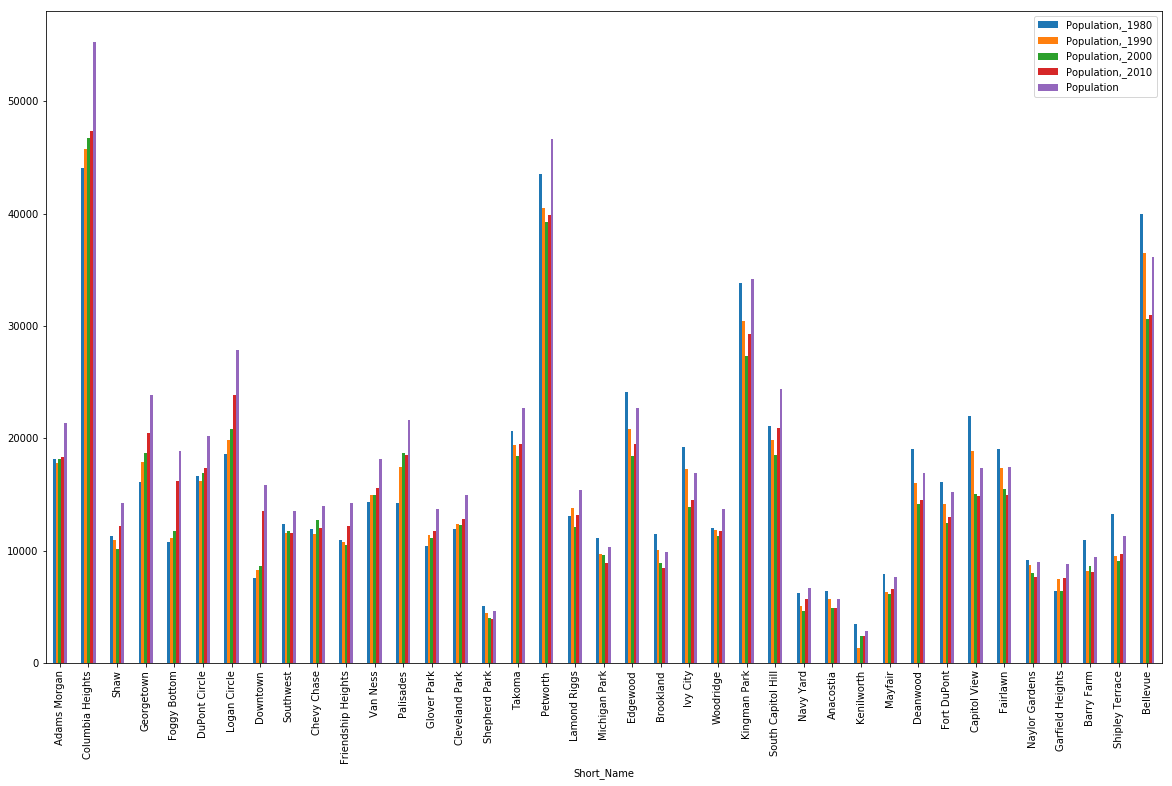

In [10]:
df_2010Population = df[['Population,_1980', 'Population,_1990','Population,_2000','Population,_2010', 'Population']]

df_2010Population.head()

#ax = df_2010Population.plot(kind='line', figsize=(20, 8), color=['#5cb85c', '#5bc0de', '#d9534f'], fontsize= 14)
#plt.legend(fontsize = 14)
#plt.title('Population Change',fontsize=16)
#plt.xlabel('Neighborhood')
#plt.tick_label('Short_Name')
#ax.set_alpha(0.8)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
#for i in ax.patches:
#    totals.append(i.get_height())

# set individual bar lables using above list
#total = sum(totals)

#for i in ax.patches:
   # get_x pulls left or right; get_height pushes up or down
#    ax.text(i.get_x()-.03, i.get_height()+.5, \
        #str(round((i.get_height()/total)*100, 2))+'%')
#        str(round(i.get_height(), 2))+'%')
df_2010Population.plot(kind='bar', figsize=(20, 12))

#plt.xlabel('Short_Name') # add to x-label to the plot
#plt.ylabel('Population,_2010') # add y-label to the plot
#plt.title('DC Population 2010') # add title to the plot
#plt.tick_label('Short_Name')
#plt.show(5)

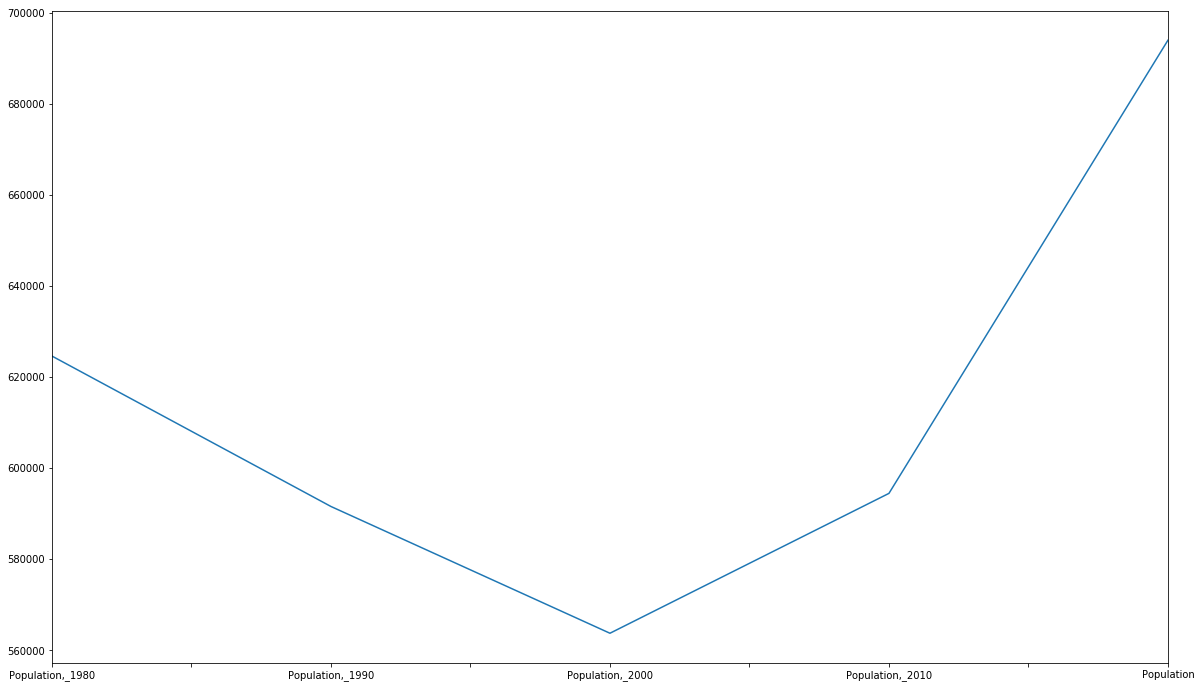

In [11]:
df_2010Population_total = df_2010Population.sum(numeric_only=True)
#df_2010Population.loc['Total'] = df_2010Population.sum(numeric_only=True)
df_2010Population_total.plot(kind='line',figsize=(20, 12))

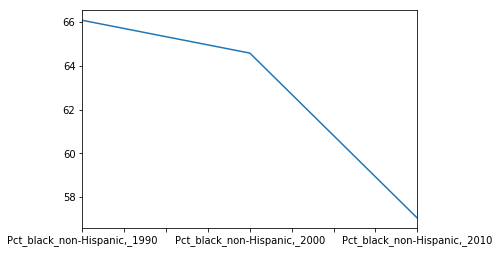

In [12]:
df_eth = df[['Pct_black_non-Hispanic,_1990' ,'Pct_black_non-Hispanic,_2000','Pct_black_non-Hispanic,_2010', 'Pct_white_non-Hispanic,_1990','Pct_white_non-Hispanic,_2000','Pct_white_non-Hispanic,_2010','Pct_Hispanic,_1990','Pct_Hispanic,_2000','Pct_Hispanic,_2010','Pct_Asian/PI_non-Hispanic_1990','Pct_Asian/PI_non-Hispanic_2000','Pct_Asian/PI_non-Hispanic_2010']]
df_eth_blk =  df[['Pct_black_non-Hispanic,_1990' ,'Pct_black_non-Hispanic,_2000','Pct_black_non-Hispanic,_2010']]
df_eth_wht = df[['Pct_white_non-Hispanic,_1990','Pct_white_non-Hispanic,_2000','Pct_white_non-Hispanic,_2010']]

df_eth_blk_total = df_eth_blk.mean(numeric_only=True)
#df_eth_blk_t = df_eth_blk.transpose()
#df_eth_blk.plot(kind='bar', 
#             stacked=False,
#             figsize=(20, 10), # pass a tuple (x, y) size
#             )

#plt.title('Immigration Trend of Top 5 Countries')
#plt.ylabel('Number of Immigrants')
#plt.xlabel('Years')

#plt.show()
df_eth_blk_total.plot(kind='line')

In [13]:
#map all populations
map_DC_pop = folium.Map(location=[latitudeDC, longitudeDC], zoom_start=12)

# add markers to map
for lat, lng, neighborghood, population, w_population, b_population, h_population, a_population in zip(df['lat_ctr'], df['lon_ctr'], df['Short_Name'], df['Population'],df['Pct_white_non-Hispanic,_2010'],df['Pct_black_non-Hispanic,_2010'],df['Pct_Hispanic,_2010'], df['Pct_Asian/PI_non-Hispanic_2010']):
    label = 'Neighborhood: {}, Population: {}, % White: {}, % Black: {}, % Hispanic: {}, % Asian PI: {}'.format(neighborghood, population,w_population, b_population, h_population, a_population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= population*.0005,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_DC_pop)  
    
map_DC_pop

In [14]:
#map black populations
map_DC_blk = folium.Map(location=[latitudeDC, longitudeDC], zoom_start=12)

# add markers to map
for lat, lng, neighborghood, population, w_population, b_population, h_population, a_population in zip(df['lat_ctr'], df['lon_ctr'], df['Short_Name'], df['Population'],df['Pct_white_non-Hispanic,_2010'],df['Pct_black_non-Hispanic,_2010'],df['Pct_Hispanic,_2010'], df['Pct_Asian/PI_non-Hispanic_2010']):
    label = 'Neighborhood: {}, Population: {}, % White: {}, % Black: {}, % Hispanic: {}, % Asian PI: {}'.format(neighborghood, population,w_population, b_population, h_population, a_population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= b_population*.25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.0,
        parse_html=False).add_to(map_DC_blk)  
    
map_DC_blk

In [15]:
#map black populations
map_DC_wht = folium.Map(location=[latitudeDC, longitudeDC], zoom_start=12)

# add markers to map
for lat, lng, neighborghood, population, w_population, b_population, h_population, a_population in zip(df['lat_ctr'], df['lon_ctr'], df['Short_Name'], df['Population'],df['Pct_white_non-Hispanic,_2010'],df['Pct_black_non-Hispanic,_2010'],df['Pct_Hispanic,_2010'], df['Pct_Asian/PI_non-Hispanic_2010']):
    label = 'Neighborhood: {}, Population: {}, % White: {}, % Black: {}, % Hispanic: {}, % Asian PI: {}'.format(neighborghood, population,w_population, b_population, h_population, a_population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= w_population*.5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_DC_wht)  
    
map_DC_wht

In [16]:
for lat, lng, neighborghood, population, w_population, b_population, h_population, a_population in zip(df['lat_ctr'], df['lon_ctr'], df['Short_Name'], df['Population'],df['Pct_white_non-Hispanic,_1990'],df['Pct_black_non-Hispanic,_1990'],df['Pct_Hispanic,_1990'], df['Pct_Asian/PI_non-Hispanic_1990']):
    label = 'Neighborhood: {}, Population: {}, % White: {}, % Black: {}, % Hispanic: {}, % Asian PI: {}'.format(neighborghood, population,w_population, b_population, h_population, a_population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= b_population*.25,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.0,
        parse_html=False).add_to(map_DC_blk)  
    
map_DC_blk

In [17]:
map_DC_wht = folium.Map(location=[latitudeDC, longitudeDC], zoom_start=12)
for lat, lng, neighborghood, population, w_population, b_population, h_population, a_population in zip(df['lat_ctr'], df['lon_ctr'], df['Short_Name'], df['Population'],df['Pct_white_non-Hispanic,_1990'],df['Pct_black_non-Hispanic,_1990'],df['Pct_Hispanic,_1990'], df['Pct_Asian/PI_non-Hispanic_1990']):
    label = 'Neighborhood: {}, Population: {}, % White: {}, % Black: {}, % Hispanic: {}, % Asian PI: {}'.format(neighborghood, population,w_population, b_population, h_population, a_population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= w_population*.25,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.0,
        parse_html=False).add_to(map_DC_wht)  
    
map_DC_wht

#map black populations
map_DC_blk = folium.Map(location=[latitudeDC, longitudeDC], zoom_start=12)

# add markers to map
for lat, lng, neighborghood, population, w_population, b_population, h_population, a_population in zip(df['lat_ctr'], df['lon_ctr'], df['Short_Name'], df['Population'],df['Pct_white_non-Hispanic,_2010'],df['Pct_black_non-Hispanic,_2010'],df['Pct_Hispanic,_2010'], df['Pct_Asian/PI_non-Hispanic_2010']):
    label = 'Neighborhood: {}, Population: {}, % White: {}, % Black: {}, % Hispanic: {}, % Asian PI: {}'.format(neighborghood, population,w_population, b_population, h_population, a_population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= w_population*.25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.0,
        parse_html=False).add_to(map_DC_wht)  
    
map_DC_wht

In [18]:
#Poverty Rate
pv_rate = df[['Poverty_rate_(Pct),_1980', 'Poverty_rate_(Pct),_1990','Poverty_rate_(Pct),_2000','Poverty_rate_(Pct),_2007-11']]

pv_rate.loc['Average'] = pv_rate.mean(numeric_only=True)
pv_rate
pv_rate_avg=pv_rate.loc['Average']
pv_rate


/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,"Poverty_rate_(Pct),_1980","Poverty_rate_(Pct),_1990","Poverty_rate_(Pct),_2000","Poverty_rate_(Pct),_2007-11"
Short_Name,,,,
Adams Morgan,15.000000,10.000000,10.000000,5.600000
Columbia Heights,24.000000,24.000000,26.000000,17.000000
Shaw,27.000000,22.000000,26.000000,17.000000
Georgetown,16.000000,16.000000,15.000000,11.000000
Foggy Bottom,13.000000,21.000000,28.000000,29.000000
DuPont Circle,16.000000,11.000000,11.000000,13.000000
Logan Circle,29.000000,25.000000,25.000000,12.000000
Downtown,27.000000,36.000000,33.000000,26.000000
Southwest,21.000000,20.000000,22.000000,19.000000


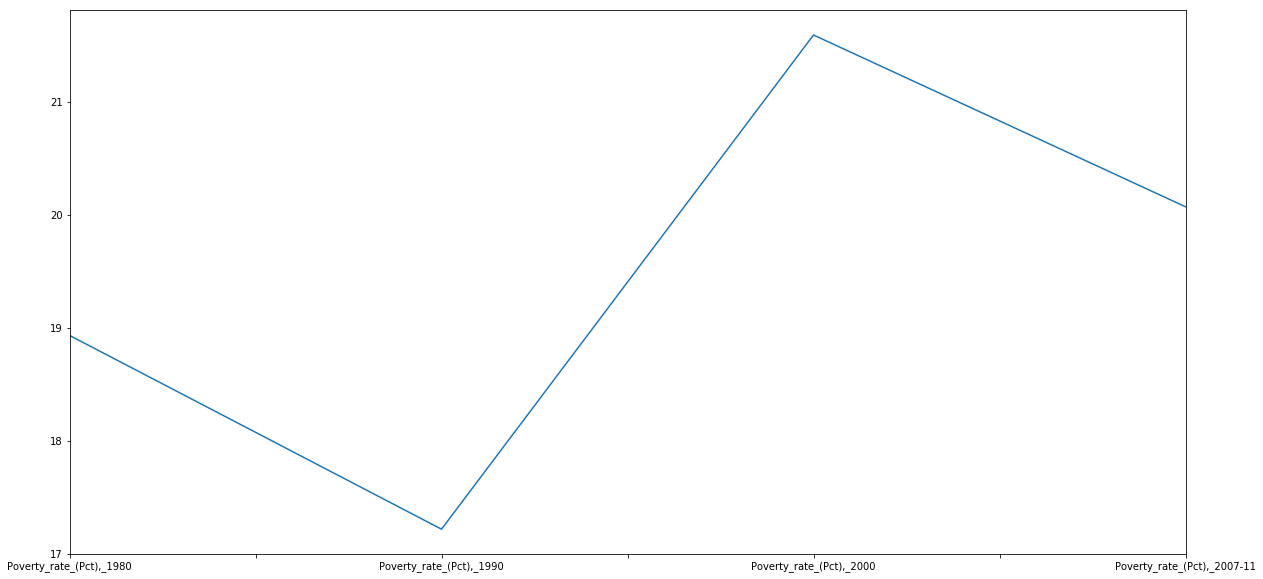

In [19]:
pv_rate_avg.plot(kind='line', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

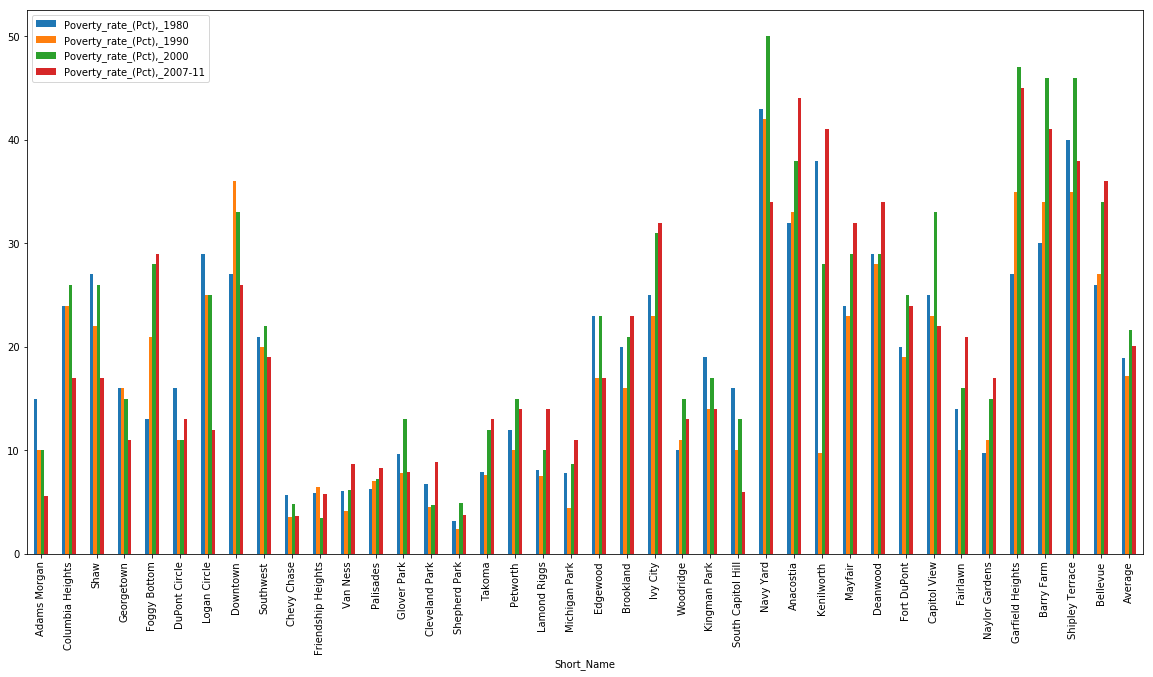

In [20]:
pv_rate.plot(kind='bar',stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

In [21]:
map_DC_prate = folium.Map(location=[latitudeDC, longitudeDC], zoom_start=12)

# add markers to map
for lat, lng, neighborghood, population, p_rate in zip(df['lat_ctr'], df['lon_ctr'], df['Short_Name'], df['Population'],df['Poverty_rate_(Pct),_2007-11']):
    label = 'Neighborhood: {}, Population: {}, Poverty Rate: {}'.format(neighborghood, population,p_rate)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= p_rate*.5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_DC_prate)  
    
map_DC_prate

In [22]:
#df.append(df.sum(numeric_only=True), ignore_index=True)
df_vcrimes = df[['Violent_crimes,_2000','Violent_crimes,_2001','Violent_crimes,_2002','Violent_crimes,_2003','Violent_crimes,_2004','Violent_crimes,_2005','Violent_crimes,_2006','Violent_crimes,_2007','Violent_crimes,_2008','Violent_crimes,_2009','Violent_crimes,_2010','Violent_crimes,_2011']]
df_pcrimes = df[['Property_crimes,_2000','Property_crimes,_2001','Property_crimes,_2002','Property_crimes,_2003','Property_crimes,_2004','Property_crimes,_2005','Property_crimes,_2006','Property_crimes,_2007','Property_crimes,_2008','Property_crimes,_2009','Property_crimes,_2010','Property_crimes,_2011']]
df_vcrimes_avg = df_vcrimes.mean(numeric_only = True)
df_vcrimes_t=df_vcrimes.transpose()
df_vcrimes_avg_t=df_vcrimes_avg.transpose()
df_vcrimes_avg_t.head()






Violent_crimes,_2000    16.353846
Violent_crimes,_2001    16.505128
Violent_crimes,_2002    16.153846
Violent_crimes,_2003    16.358974
Violent_crimes,_2004    13.946154
dtype: float64

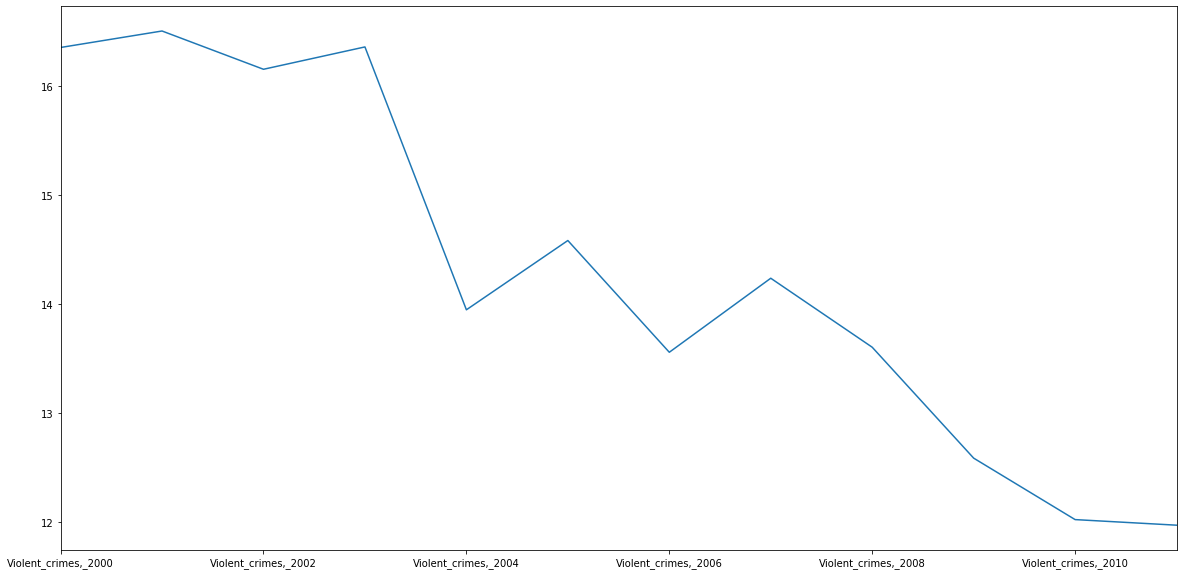

In [33]:
df_vcrimes_avg_t.plot(kind='line', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

In [23]:
map_DC_vcrimes = folium.Map(location=[latitudeDC, longitudeDC], zoom_start=12)

# add markers to map
for lat, lng, neighborhood, v_crimes_2000, v_crimes_2011 in zip(df['lat_ctr'], df['lon_ctr'], df['Short_Name'], df['Violent_crimes,_2000'],df['Violent_crimes,_2011']):
    label = 'Neighborhood: {}, 2000 Violent Crime Rate: {}, 2011 Violent Crime Rate: {}'.format(neighborhood, v_crimes_2000, v_crimes_2011)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= v_crimes_2000*.5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.0,
        parse_html=False).add_to(map_DC_vcrimes)  
for lat, lng, neighborhood, v_crimes_2000, v_crimes_2011 in zip(df['lat_ctr'], df['lon_ctr'], df['Short_Name'], df['Violent_crimes,_2000'],df['Violent_crimes,_2011']):
    label = 'Neighborhood: {}, 2000 Violent Crime Rate: {}, 2011 Violent Crime Rate: {}'.format(neighborhood, v_crimes_2000, v_crimes_2011)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= v_crimes_2011*.5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.0,
        parse_html=False).add_to(map_DC_vcrimes)  
    
map_DC_vcrimes

In [24]:
#Family Income
df_family_income = df[['Avg._family_income,_1979','Avg._family_income,_1989','Avg._family_income,_1999','Avg._family_income,_2007-11']]
df_family_income_avg = df_family_income.mean(numeric_only = True)

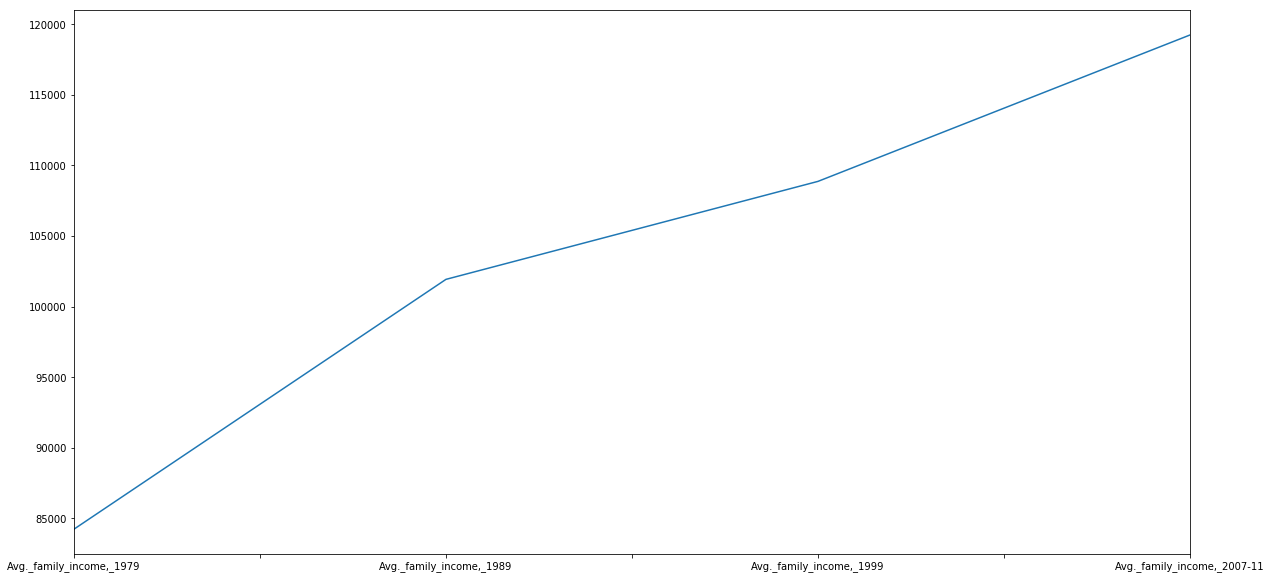

In [25]:
df_family_income_avg.plot(kind='line', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

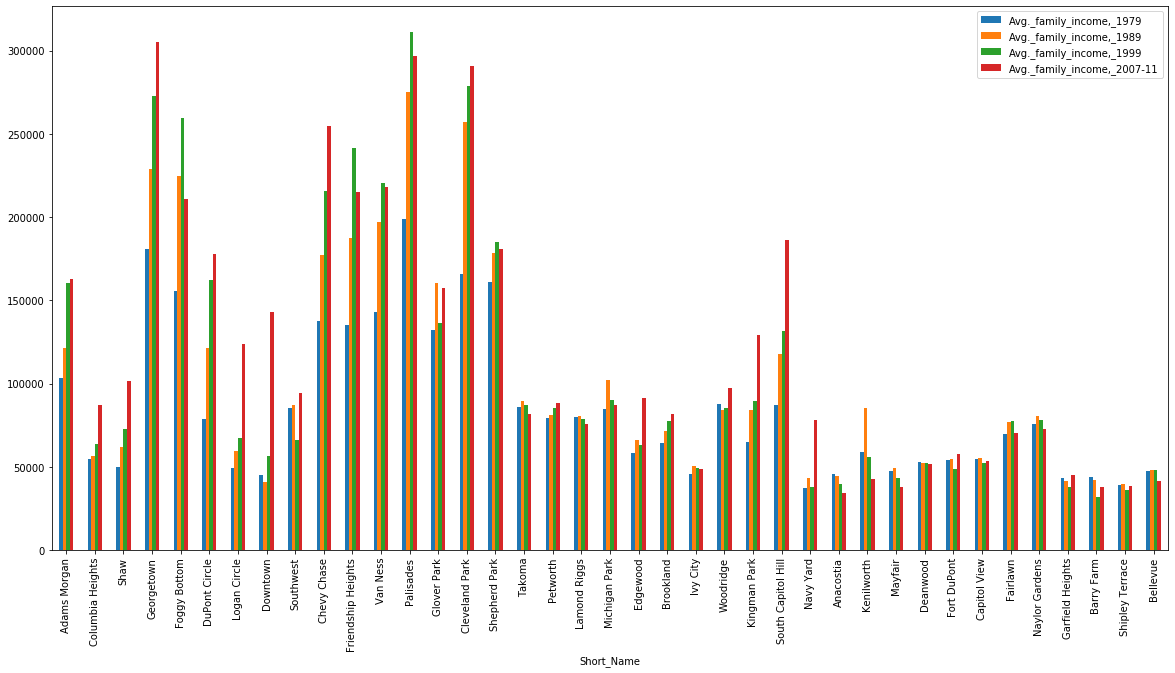

In [42]:
df_family_income.plot(kind='bar', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

In [26]:
map_DC_income = folium.Map(location=[latitudeDC, longitudeDC], zoom_start=12)

# add markers to map
for lat, lng, neighborhood, income_1979, income_2011 in zip(df['lat_ctr'], df['lon_ctr'], df['Short_Name'], df['Avg._family_income,_1979'],df['Avg._family_income,_2007-11']):
    label = 'Neighborhood: {}, Average Family Income 1979: {}, Average Family Income 2011: {}'.format(neighborhood, income_1979, income_2011)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= income_1979*.00008,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.0,
        parse_html=False).add_to(map_DC_income)  
for lat, lng, neighborhood, income_1979, income_2011 in zip(df['lat_ctr'], df['lon_ctr'], df['Short_Name'], df['Avg._family_income,_1979'],df['Avg._family_income,_2007-11']):
    label = 'Neighborhood: {}, Average Family Income 1979: {}, Average Family Income 2011: {}'.format(neighborhood, income_1979, income_2011)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= income_2011*.00008,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.0,
        parse_html=False).add_to(map_DC_income) 
    
map_DC_income

In [27]:
home_value = df[['Median_sales_price,_1995','Median_sales_price,_1995','Median_sales_price,_1995','Median_sales_price,_1996','Median_sales_price,_1997','Median_sales_price,_1998','Median_sales_price,_1999','Median_sales_price,_2000','Median_sales_price,_2001','Median_sales_price,_2002','Median_sales_price,_2003','Median_sales_price,_2004','Median_sales_price,_2005','Median_sales_price,_2006','Median_sales_price,_2007','Median_sales_price,_2008','Median_sales_price,_2009','Median_sales_price,_2010','Median_sales_price,_2011','Median_sales_price,_2012']]

In [28]:
df['Home Value Change'] = df['Median_sales_price,_2012'] / df['Median_sales_price,_1995']-1
df_home_value_change = df['Median_sales_price,_2012'] / df['Median_sales_price,_1995']-1
home_value_average = home_value.mean()
df.head()

,neighborhood_cluster,Cluster_num,Full_Name,lon_ctr,lat_ctr,Population,"Population,_1980","Population,_1990","Population,_2000","Population,_2010",...,Charter_school_enrollment_2007,Charter_school_enrollment_2008,Charter_school_enrollment_2009,Charter_school_enrollment_2010,Charter_school_enrollment_2011,Charter_school_enrollment_2012,CAS_math_prof,CAS_read_prof,Short_Name,Home Value Change
Short_Name,,,,,,,,,,,,,,,,,,,,,
Adams Morgan,Cluster 1,1,"Kalorama Heights, Adams Morgan, Lanier Heights",-77.047702,38.919379,21407,18149,17812,18167,18338,...,158,187,226,239,515,436,0.680769,0.634615,Adams Morgan,1.383292
Columbia Heights,Cluster 2,2,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",-77.031769,38.928700,55307,44081,45728,46779,47378,...,2714,2940,3445,3656,2926,3992,0.582751,0.529604,Columbia Heights,1.839506
Shaw,Cluster 3,3,"Howard University, Le Droit Park, Cardozo/Shaw",-77.023415,38.921257,14211,11335,10925,10128,12174,...,1407,1299,1362,1309,243,1507,0.550725,0.531401,Shaw,3.452055
Georgetown,Cluster 4,4,"Georgetown, Burleith/Hillandale",-77.066409,38.909686,23889,16071,17919,18741,20464,...,86,0,0,0,0,0,0.859155,0.887324,Georgetown,1.196281
Foggy Bottom,Cluster 5,5,"West End, Foggy Bottom, GWU",-77.048975,38.902386,18865,10731,11104,11723,16160,...,0,0,0,0,0,0,0.666667,0.750000,Foggy Bottom,NaN


In [29]:
map_DC_home = folium.Map(location=[latitudeDC, longitudeDC], zoom_start=12)

# add markers to map
for lat, lng, neighborhood, home_price1995, home_price2012, homechange in zip(df['lat_ctr'], df['lon_ctr'], df['Short_Name'], df['Median_sales_price,_1995'],df['Median_sales_price,_2012'],df['Home Value Change']):
    label = 'Neighborhood: {}, Median Home Price 1995: {}, Median Home Price 2012: {}, Home Value Change: {}'.format(neighborhood, home_price1995, home_price2012, homechange)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= home_price1995*.000025,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0,
        parse_html=False).add_to(map_DC_home)  
for lat, lng, neighborhood, home_price1995, home_price2012, homechange in zip(df['lat_ctr'], df['lon_ctr'], df['Short_Name'], df['Median_sales_price,_1995'],df['Median_sales_price,_2012'],df['Home Value Change']):
    label = 'Neighborhood: {}, Median Home Price 1995: {}, Median Home Price 2012: {}, Home Value Change: {}'.format(neighborhood, home_price1995, home_price2012, homechange)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= home_price2012*.000025,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0,
        parse_html=False).add_to(map_DC_home)  
map_DC_home

In [79]:
map_DC_home_change = folium.Map(location=[latitudeDC, longitudeDC], zoom_start=12)

# add markers to map
for lat, lng, neighborhood, home_price1995, home_price2012, homechange in zip(df['lat_ctr'], df['lon_ctr'], df['Short_Name'], df['Median_sales_price,_1995'],df['Median_sales_price,_2012'],df['Home Value Change']):
    label = 'Neighborhood: {}, Median Home Price 1995: {}, Median Home Price 2012: {}, Home Value Change: {}'.format(neighborhood, home_price1995, home_price2012, homechange)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= homechange*3,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0,
        parse_html=False).add_to(map_DC_home_change)
    
map_DC_home_change

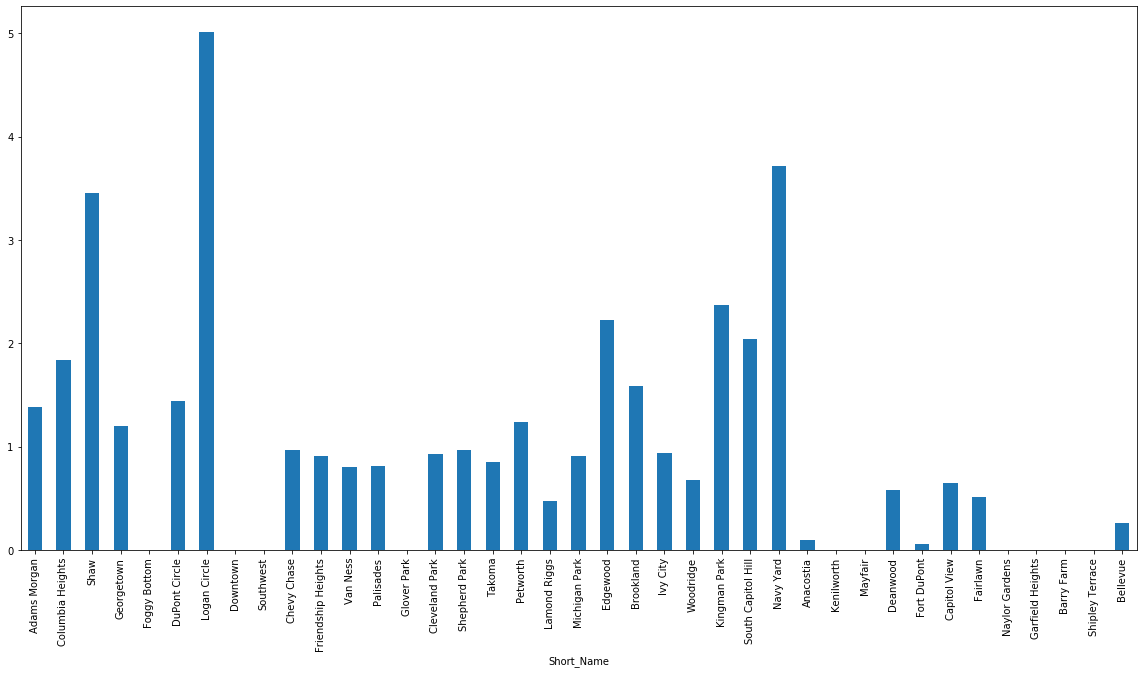

In [80]:
df_home_value_change.plot(kind='bar', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

In [83]:
df_home_value_change_95_12 = df[['Median_sales_price,_1995','Median_sales_price,_2012']]

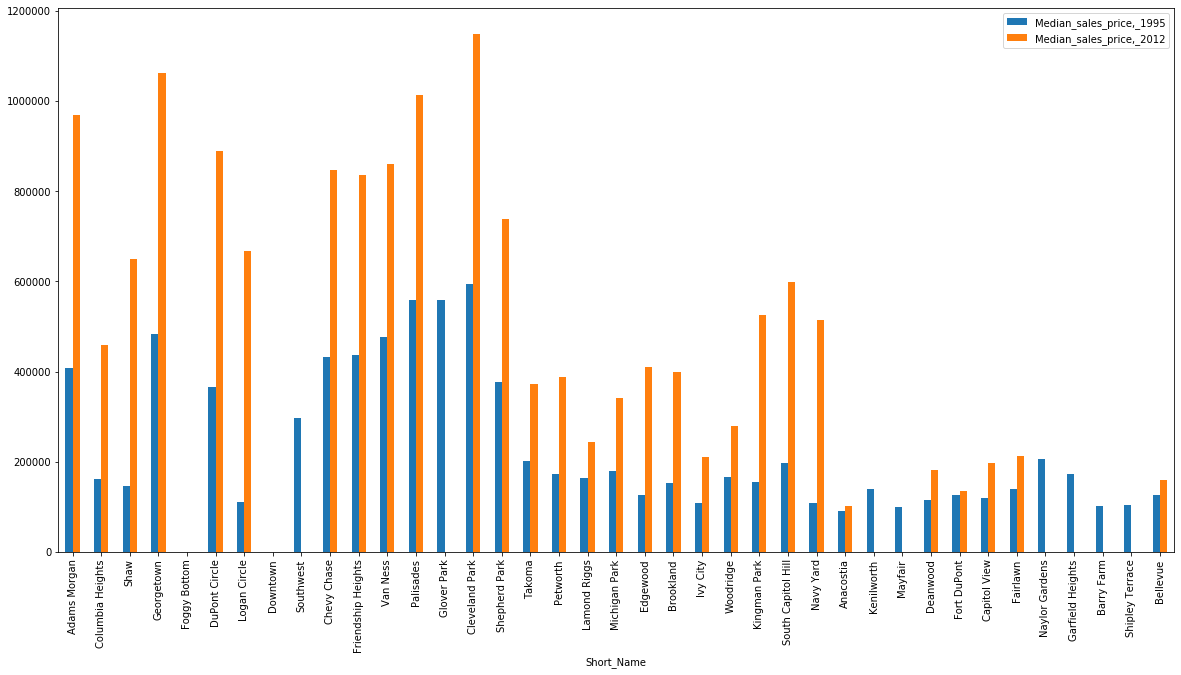

In [84]:
df_home_value_change_95_12.plot(kind='bar', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

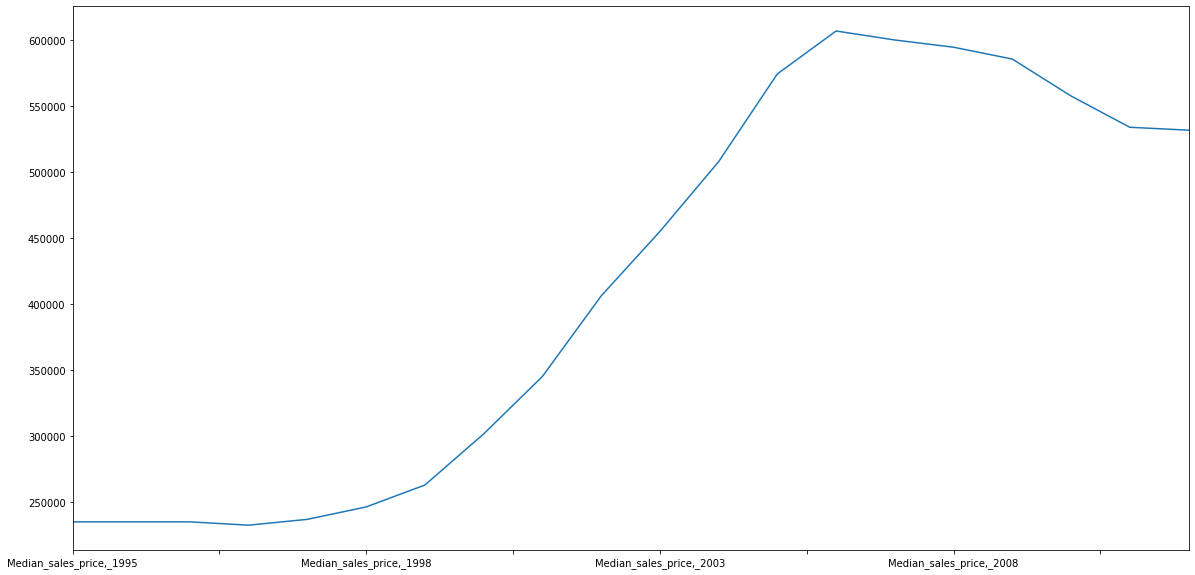

In [86]:
home_value_average.plot(kind='line', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

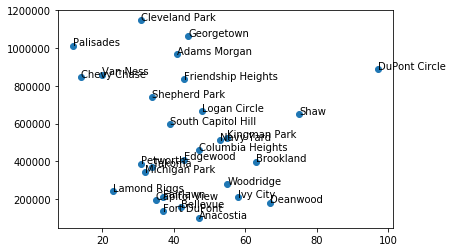

In [29]:
#Scatter Plot template

y = df['Median_sales_price,_2012']
z = df['Property_crimes,_2011']
n = df['Short_Name']
fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))
plt.show()

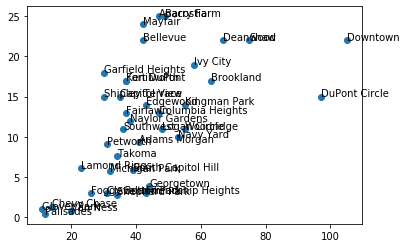

In [30]:
#Scatter Plot template

y = df['Violent_crimes,_2011']
z = df['Property_crimes,_2011']
n = df['Short_Name']
fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))
plt.show()

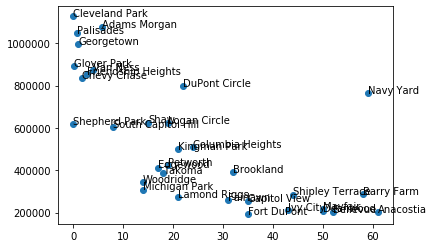

In [31]:
#Scatter Plot template

y = df['Median_sales_price,_2011']
z = df['Pct_child_in_poverty_2007-11']
n = df['Short_Name']
fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))
plt.show()

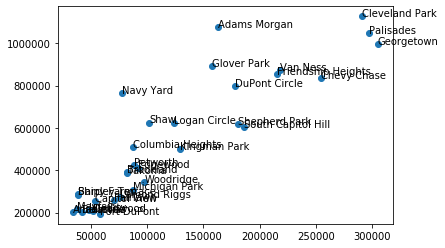

In [32]:
#Scatter Plot template

y = df['Median_sales_price,_2011']
z = df['Avg._family_income,_2007-11']
n = df['Short_Name']
fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))
plt.show()

In [35]:
from scipy.stats import linregress


In [3]:
#KNN
import itertools
#import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
#import pandas as pd
#import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0c177df60>]],
      dtype=object)

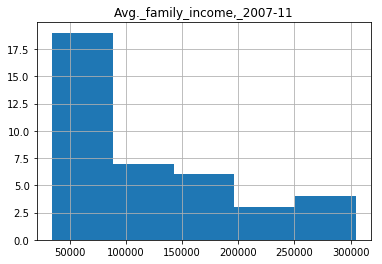

In [4]:
df['Violent_crimes,_2011'].value_counts()
df.hist(column='Avg._family_income,_2007-11', bins=5)

In [6]:
df_knn = df[['Avg._family_income,_2007-11','Violent_crimes,_2011','Property_crimes,_2011','Median_sales_price,_2011']]
#df_knn.dropna()
df_knn['Median_sales_price,_2011'].fillna((df_knn['Median_sales_price,_2011'].mean()), inplace=True)
df_knn['income level'] = np.where(df['Avg._family_income,_2007-11']>=200000, 3, np.where(df['Avg._family_income,_2007-11']<=60000, 1, 2))
df_knn

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,"Avg._family_income,_2007-11","Violent_crimes,_2011","Property_crimes,_2011","Median_sales_price,_2011",income level
Short_Name,,,,,
Adams Morgan,162891,9.3,41,1.076000e+06,2
Columbia Heights,87204,13.0,47,5.100000e+05,2
Shaw,101583,22.0,75,6.250000e+05,2
Georgetown,304995,3.9,44,9.960000e+05,3
Foggy Bottom,211064,3.0,26,5.338788e+05,3
DuPont Circle,177893,15.0,97,7.980000e+05,2
Logan Circle,123697,11.0,48,6.220000e+05,2
Downtown,142881,22.0,105,5.338788e+05,2
Southwest,94339,11.0,36,5.338788e+05,2


In [7]:
X = df_knn[['Avg._family_income,_2007-11','Violent_crimes,_2011','Property_crimes,_2011','Median_sales_price,_2011']].values  #.astype(float)
X[0:4]
y = df_knn['income level'].values
y[0:4]
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:4]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (31, 4) (31,)
Test set: (8, 4) (8,)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [9]:
yhat = neigh.predict(X_test)
yhat[0:4]
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  0.75


In [10]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.625, 0.625, 0.625, 0.75 , 0.875, 0.75 , 0.625, 0.75 , 0.625])

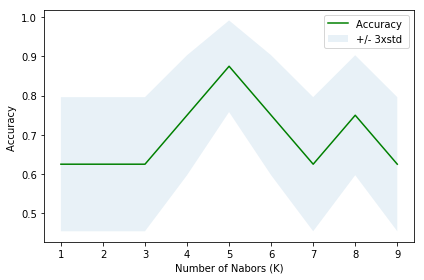

In [11]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [12]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.875 with k= 5


/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


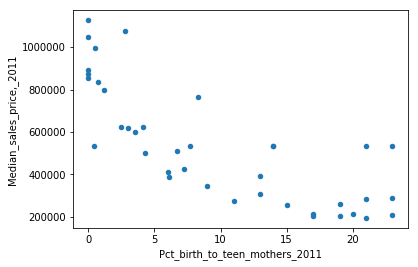

In [13]:
#Multiple Linear Regression
cdf = df[['Median_sales_price,_2011','Pct_birth_to_teen_mothers_2011','Pct_child_in_poverty_2007-11','Avg._family_income,_2007-11','Person_receiv_food_stamps_2011','Violent_crimes,_2011','Property_crimes,_2011']]
cdf['Median_sales_price,_2011'].fillna((cdf['Median_sales_price,_2011'].mean()), inplace=True)
cdf.head(9)
cdf.plot.scatter(x='Pct_birth_to_teen_mothers_2011',
                y='Median_sales_price,_2011')

In [14]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

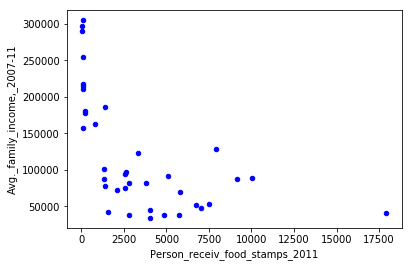

In [15]:
train.plot.scatter(x='Person_receiv_food_stamps_2011', y = 'Avg._family_income,_2007-11',  color='blue')


In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Pct_birth_to_teen_mothers_2011','Pct_child_in_poverty_2007-11','Person_receiv_food_stamps_2011','Violent_crimes,_2011','Property_crimes,_2011']])
y = np.asanyarray(train[['Median_sales_price,_2011']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-2.40519254e+04  3.18666478e+03 -2.12126653e+01 -5.39616881e+03
  -6.81493117e+02]]


In [17]:
y_hat= regr.predict(test[['Pct_birth_to_teen_mothers_2011','Pct_child_in_poverty_2007-11','Person_receiv_food_stamps_2011','Violent_crimes,_2011','Property_crimes,_2011']])
x = np.asanyarray(test[['Pct_birth_to_teen_mothers_2011','Pct_child_in_poverty_2007-11','Person_receiv_food_stamps_2011','Violent_crimes,_2011','Property_crimes,_2011']])
y = np.asanyarray(test[['Median_sales_price,_2011']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 419760570.76
Variance score: 0.99
